In [ ]:
'''
循环神经网络（Recurrent Neural Networks, RNN）是一类神经网络架构，
专门用于处理序列数据，能够捕捉时间序列或有序数据的动态信息，能够处理序列数据，如文本、时间序列或音频。
RNN 的关键特性是其能够保持隐状态（hidden state），使得网络能够记住先前时间步的信息，这对于处理序列数据至关重要。
把这些记得的信息存储在每个时间段的隐藏层里，当前时段的隐藏层包含之前所有时间节点所输入的隐藏层信息（相当于短期记忆而并非长期记忆，结合历史数据以便于对接下来的数据预测


RNN 是一种处理序列数据的神经网络，它通过循环连接来处理序列中的每个元素，并在每个时间步传递信息，以下是图中各部分的说明：

输入序列（Xt, Xt-1, Xt+1, ...）：图中的粉色圆圈代表输入序列中的各个元素，如Xt表示当前时间步的输入，Xt-1表示前一个时间步的输入，以此类推。

隐藏状态（ht, ht-1, ht+1, ...）：绿色矩形代表RNN的隐藏状态，它在每个时间步存储有关序列的信息。ht是当前时间步的隐藏状态，ht-1是前一个时间步的隐藏状态。

权重矩阵（U, W, V）：

U：输入到隐藏状态的权重矩阵，用于将输入Xt转换为隐藏状态的一部分。
W：隐藏状态到隐藏状态的权重矩阵，用于将前一时间步的隐藏状态ht-1转换为当前时间步隐藏状态的一部分。
V：隐藏状态到输出的权重矩阵，用于将隐藏状态ht转换为输出Yt。
输出序列（Yt, Yt-1, Yt+1, ...）：蓝色圆圈代表RNN在每个时间步的输出，如Yt是当前时间步的输出。

循环连接：RNN的特点是隐藏状态的循环连接，这允许网络在处理当前时间步的输入时考虑到之前时间步的信息。
RNN的神经元：

增加时间维度：每个时间步的神经元不仅处理当前输入  ，还接收上一时间步的隐状态  。

隐状态的本质：就是RNN神经元在时间步之间的“记忆输出”，可视为神经元的时间维度扩展。
同一组神经元在不同时间步重复使用（参数 共享）。

隐状态 是神经元在时间步间的“记忆载体”。

展开（Unfold）：图中展示了RNN在序列上的展开过程，这有助于理解RNN如何在时间上处理序列数据。在实际的RNN实现中，这些步骤是并行处理的，但在概念上，我们可以将其展开来理解信息是如何流动的。

信息流动：信息从输入序列通过权重矩阵U传递到隐藏状态，然后通过权重矩阵W在时间步之间传递，最后通过权重矩阵V从隐藏状态传递到输出序列。
'''



In [1]:
'''
PyTorch 中的 RNN 基础
在 PyTorch 中，RNN 可以用于构建复杂的序列模型。
PyTorch 提供了几种 RNN 模块，包括：

torch.nn.RNN：基本的RNN单元。
torch.nn.LSTM：长短期记忆单元，能够学习长期依赖关系。
torch.nn.GRU：门控循环单元，是LSTM的简化版本，但通常更容易训练。
使用 RNN 类时，您需要指定输入的维度、隐藏层的维度以及其他一些超参数。

PyTorch 实现一个简单的 RNN 实例
以下是一个简单的 PyTorch 实现例子，使用 RNN 模型来处理序列数据并进行分类。
'''
#1、导入必要库

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

#定义 RNN 模型
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        # 定义 RNN 层
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)#input_size：输入特征的维度（如每个时间步输入向量的长度）。hidden_size：隐状态的维度（RNN的记忆容量）
        # 定义全连接层
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        out, _ = self.rnn(x)  # out: (batch_size, seq_len, hidden_size)
        #输入 x 形状：[batch_size, seq_len, input_size]（如32个样本，每个样本10个时间步，每个时间步输入5维向量）。
        # 取序列最后一个时间步的输出作为模型的输出
        out = out[:, -1, :]  # (batch_size, hidden_size)
        out = self.fc(out)  # 全连接层
        return out


#3、创建训练数据

#为了训练 RNN，我们生成一些随机的序列数据。这里的目标是将每个序列的最后一个值作为分类的目标。

# 生成一些随机序列数据
num_samples = 1000
seq_len = 10
input_size = 5
output_size = 2  # 假设二分类问题

# 随机生成输入数据 (batch_size, seq_len, input_size)
X = torch.randn(num_samples, seq_len, input_size)#X 是一个包含 1000 个序列的张量，每个序列长度为 10，每个时间步有 5 个特征。
# 随机生成目标标签 (batch_size, output_size)
Y = torch.randint(0, output_size, (num_samples,))

# 创建数据加载器
dataset = TensorDataset(X, Y)#TensorDataset 是 PyTorch 中的一个类，用于将张量组合成一个数据集。
#这意味着每个样本的输入特征 X[i] 与对应的目标标签 Y[i] 组合为一个数据样本对。
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

#4、定义损失函数与优化器

# 模型实例化
model = SimpleRNN(input_size=input_size, hidden_size=64, output_size=output_size)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 多分类交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.001)

#5、训练模型

num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # 设置模型为训练模式
    total_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        # 前向传播
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # 计算准确率
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

#6、测试模型

# 测试模型
model.eval()  # 设置模型为评估模式
with torch.no_grad():
    total = 0
    correct = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

Epoch [1/10], Loss: 0.6999, Accuracy: 49.50%
Epoch [2/10], Loss: 0.6913, Accuracy: 53.30%
Epoch [3/10], Loss: 0.6865, Accuracy: 53.40%
Epoch [4/10], Loss: 0.6852, Accuracy: 56.50%
Epoch [5/10], Loss: 0.6839, Accuracy: 56.00%
Epoch [6/10], Loss: 0.6793, Accuracy: 57.50%
Epoch [7/10], Loss: 0.6806, Accuracy: 56.20%
Epoch [8/10], Loss: 0.6776, Accuracy: 57.70%
Epoch [9/10], Loss: 0.6778, Accuracy: 57.90%
Epoch [10/10], Loss: 0.6789, Accuracy: 58.60%
Test Accuracy: 59.20%


Epoch [20/200], Loss: 0.0024
Epoch [40/200], Loss: 0.0003
Epoch [60/200], Loss: 0.0001
Epoch [80/200], Loss: 0.0001
Epoch [100/200], Loss: 0.0001
Epoch [120/200], Loss: 0.0001
Epoch [140/200], Loss: 0.0001
Epoch [160/200], Loss: 0.0001
Epoch [180/200], Loss: 0.0001
Epoch [200/200], Loss: 0.0001
Input sequence:  hello
Predicted sequence:  elloh


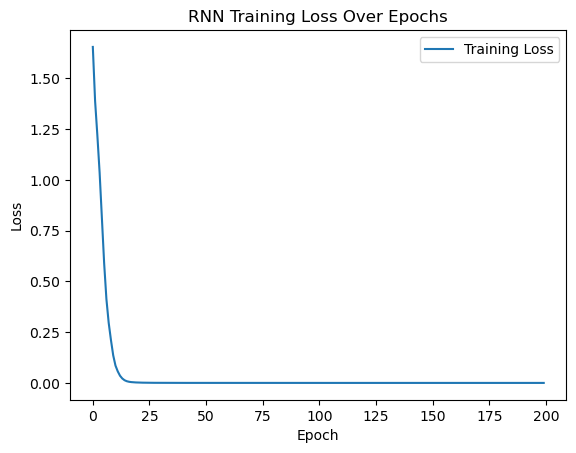

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 数据集：字符序列预测（Hello -> Elloh）
char_set = list("hello")
char_to_idx = {c: i for i, c in enumerate(char_set)}
idx_to_char = {i: c for i, c in enumerate(char_set)}

# 数据准备
input_str = "hello"
target_str = "elloh"
input_data = [char_to_idx[c] for c in input_str]
target_data = [char_to_idx[c] for c in target_str]

# 转换为独热编码
input_one_hot = np.eye(len(char_set))[input_data]

# 转换为 PyTorch Tensor
inputs = torch.tensor(input_one_hot, dtype=torch.float32)
targets = torch.tensor(target_data, dtype=torch.long)

# 模型超参数
input_size = len(char_set)
hidden_size = 8
output_size = len(char_set)
num_epochs = 200
learning_rate = 0.1

# 定义 RNN 模型
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)  # 应用全连接层
        return out, hidden

model = RNNModel(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练 RNN
losses = []
hidden = None  # 初始隐藏状态为 None
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # 前向传播
    outputs, hidden = model(inputs.unsqueeze(0), hidden)
    hidden = hidden.detach()  # 防止梯度爆炸

    # 计算损失
    loss = criterion(outputs.view(-1, output_size), targets)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")#4f是保留四位小数

# 测试 RNN
with torch.no_grad():
    test_hidden = None#相当于从“空白记忆”开始处理序列。
    test_output, _ = model(inputs.unsqueeze(0), test_hidden)#调整输入形状，原因：PyTorch要求输入形状为 [batch_size, seq_len, input_size]，添加批次维度（batch_size=1）。
    #_ 表示不保存最终隐状态（因测试只需输出）。
    predicted = torch.argmax(test_output, dim=2).squeeze().numpy()
    #对每个时间步的输出，取概率最大的类别索引作为预测结果。squeeze()去掉批次维度。.numpy()：转为NumPy数组

    print("Input sequence: ", ''.join([idx_to_char[i] for i in input_data]))
    print("Predicted sequence: ", ''.join([idx_to_char[i] for i in predicted]))

# 可视化损失
plt.plot(losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("RNN Training Loss Over Epochs")
plt.legend()
plt.show()